# Ytre Vikna Windfarm

#### Importere inn biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

## Laste inn datasett

##### TEK (1. Spetember til 18. Desember)

In [2]:
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)

In [3]:
df_tek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 299 entries, Time to SKOM-SfjHydVindhMid-T0016A3 -0120
dtypes: float64(210), int64(88), object(1)
memory usage: 5.9+ MB


##### TEK (delayed 2 hours)

In [4]:
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)

In [5]:
df_tek_delayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 299 entries, Time to SKOM-SfjHydVindhMid-T0016A3 -0120
dtypes: float64(281), object(18)
memory usage: 5.9+ MB


##### AROME Værdata (1. Spetember til 18. Desember)

In [6]:
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)

In [7]:
df_arome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 489 entries, Time to /arome_windvel_6573_1232
dtypes: float64(488), object(1)
memory usage: 9.7+ MB


## Visualiserer Produksjon i Ytre Vika Windfarm

#### Fordelingen av samlet produksjon

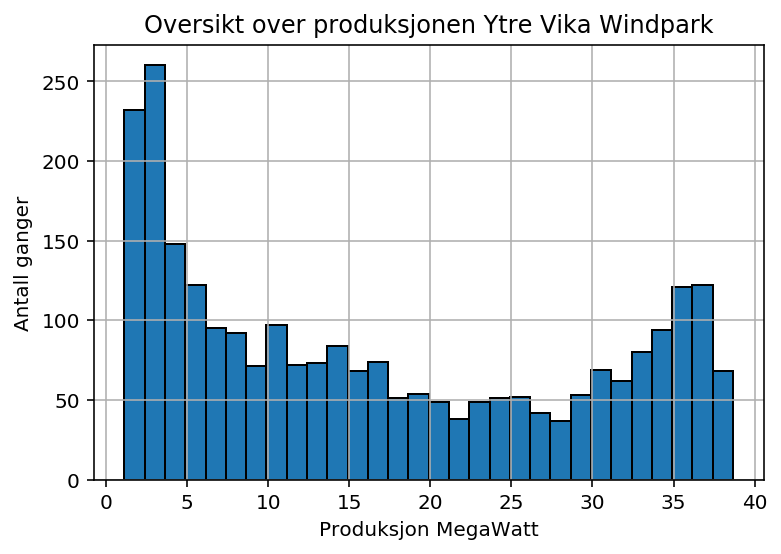

In [13]:
ax = df_tek['YVIK-YtreVikna1-Sum-produksjon'].hist(bins = 30)
plt.xlabel('Produksjon MegaWatt')
plt.ylabel('Antall ganger')
plt.title('Oversikt over produksjonen Ytre Vika Windpark')
fig = ax.get_figure()
fig.savefig('samlet produksjon.png')

#### Fordelingen av samlet produksjon

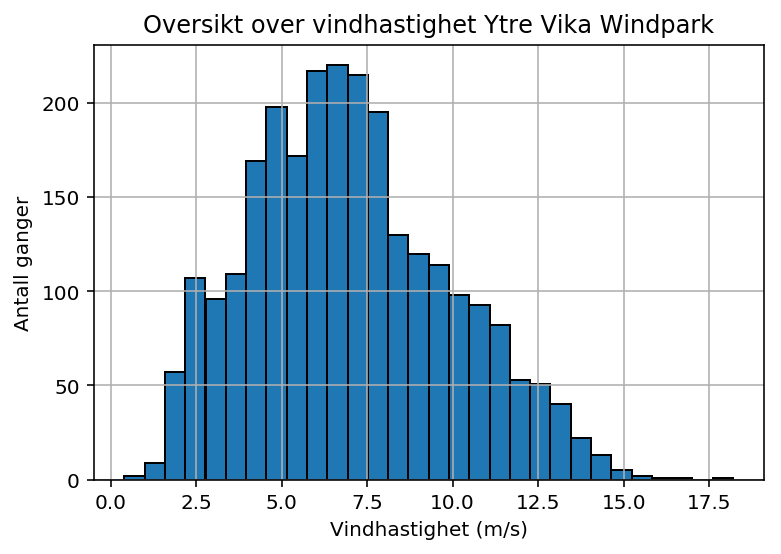

In [14]:
ax = df_tek['STORM-YVik1-Vindhast-25km'].hist(bins = 30)
plt.xlabel('Vindhastighet (m/s)')
plt.ylabel('Antall ganger')
plt.title('Oversikt over vindhastighet Ytre Vika Windpark')
fig = ax.get_figure()
fig.savefig('vindhastighet.png')

#### Vinproduskjon mot vindhastighet

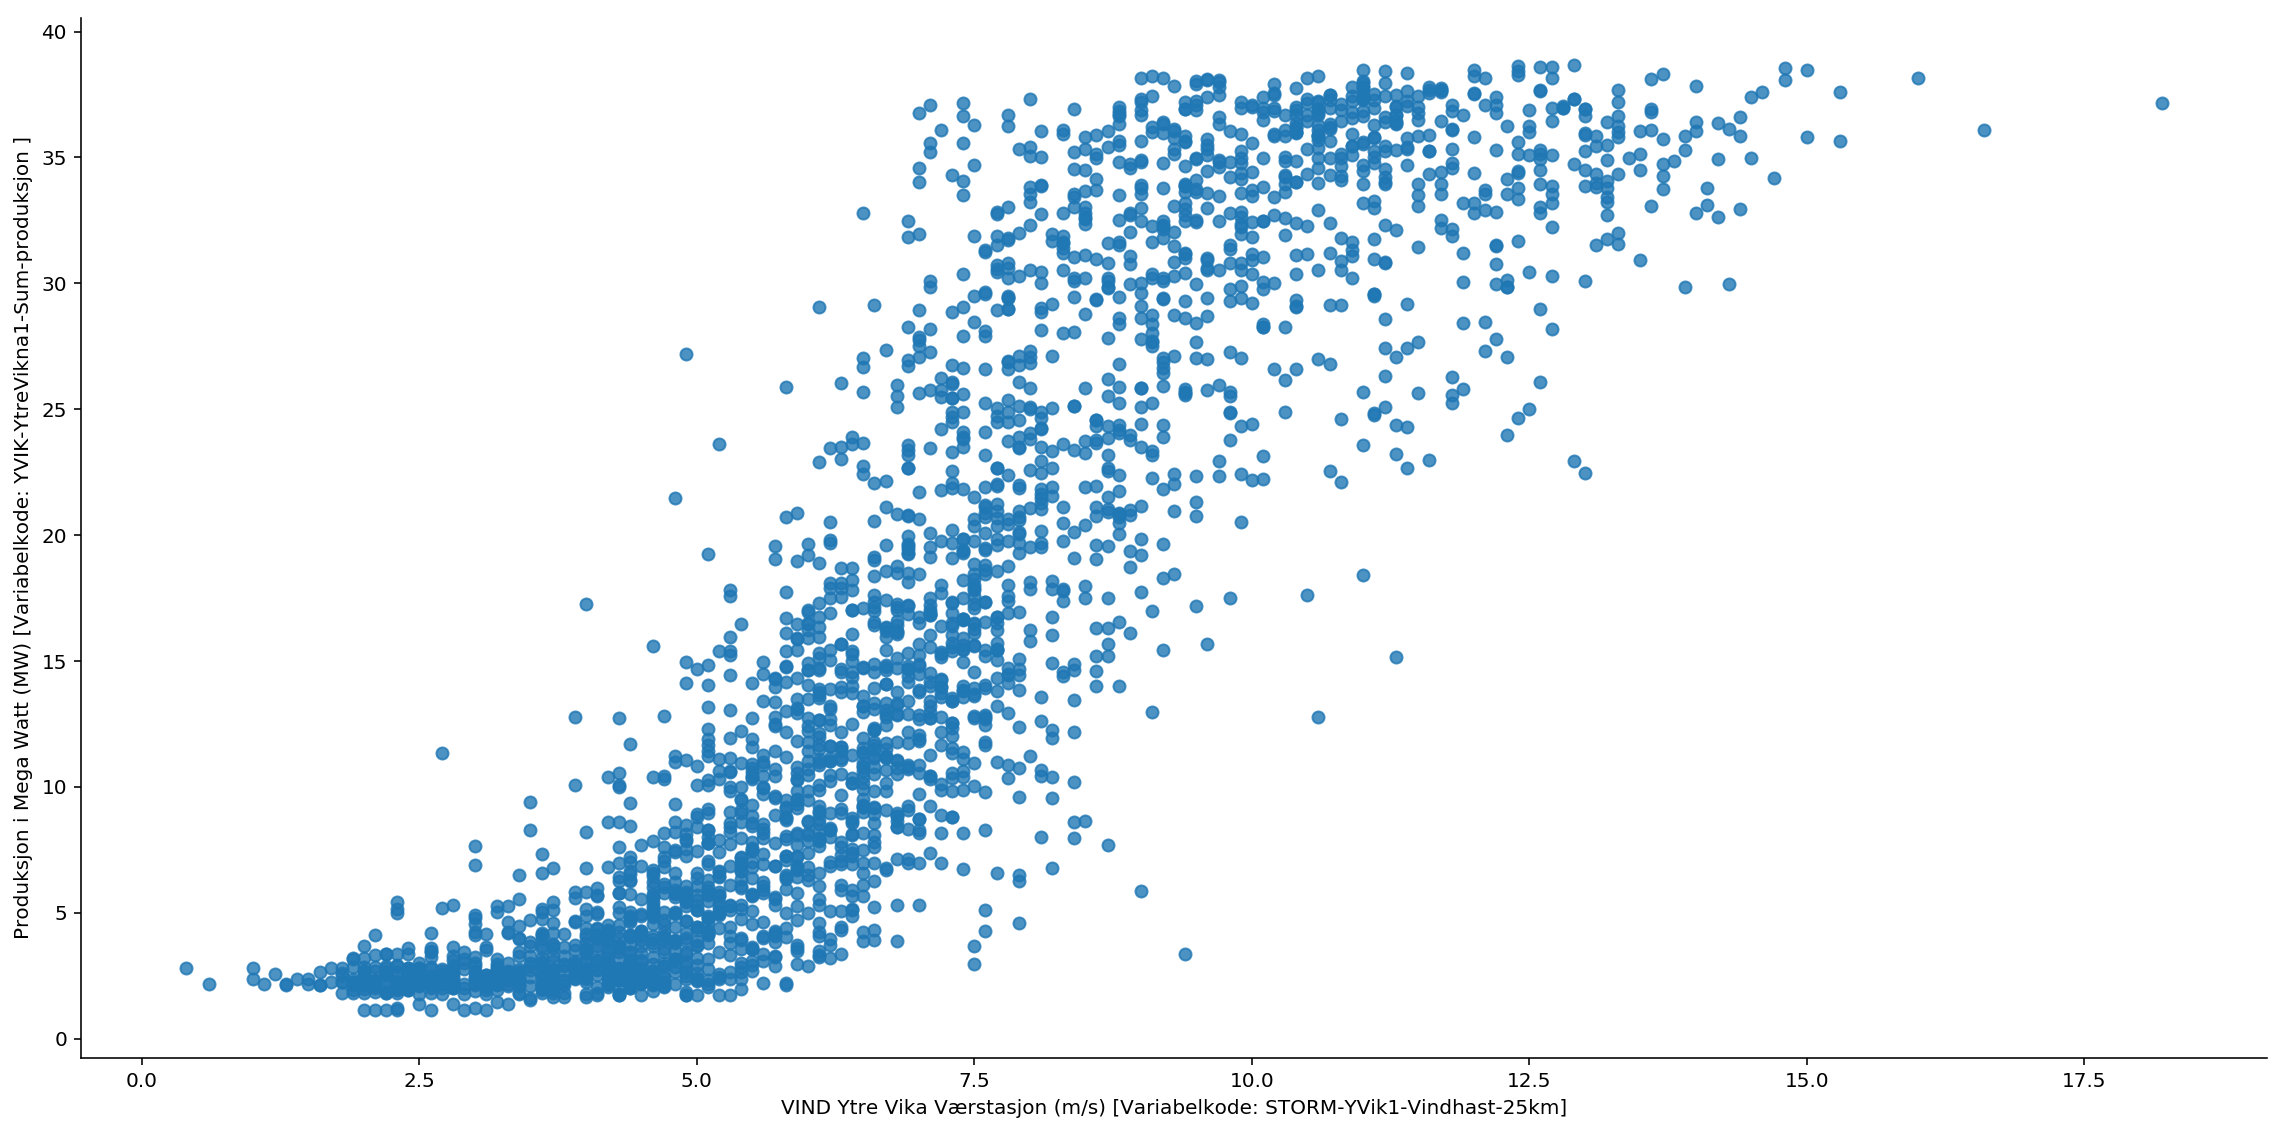

In [17]:
sns_plot = sns.lmplot(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1-Sum-produksjon',
           data=df_tek, aspect=2,size=8, fit_reg = False )
plt.xlabel('VIND Ytre Vika Værstasjon (m/s) [Variabelkode: STORM-YVik1-Vindhast-25km]')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: YVIK-YtreVikna1-Sum-produksjon ]')
sns_plot.savefig("produksjon mot vindhastighet.png")

### Samme plot men med vindretning som fargekode

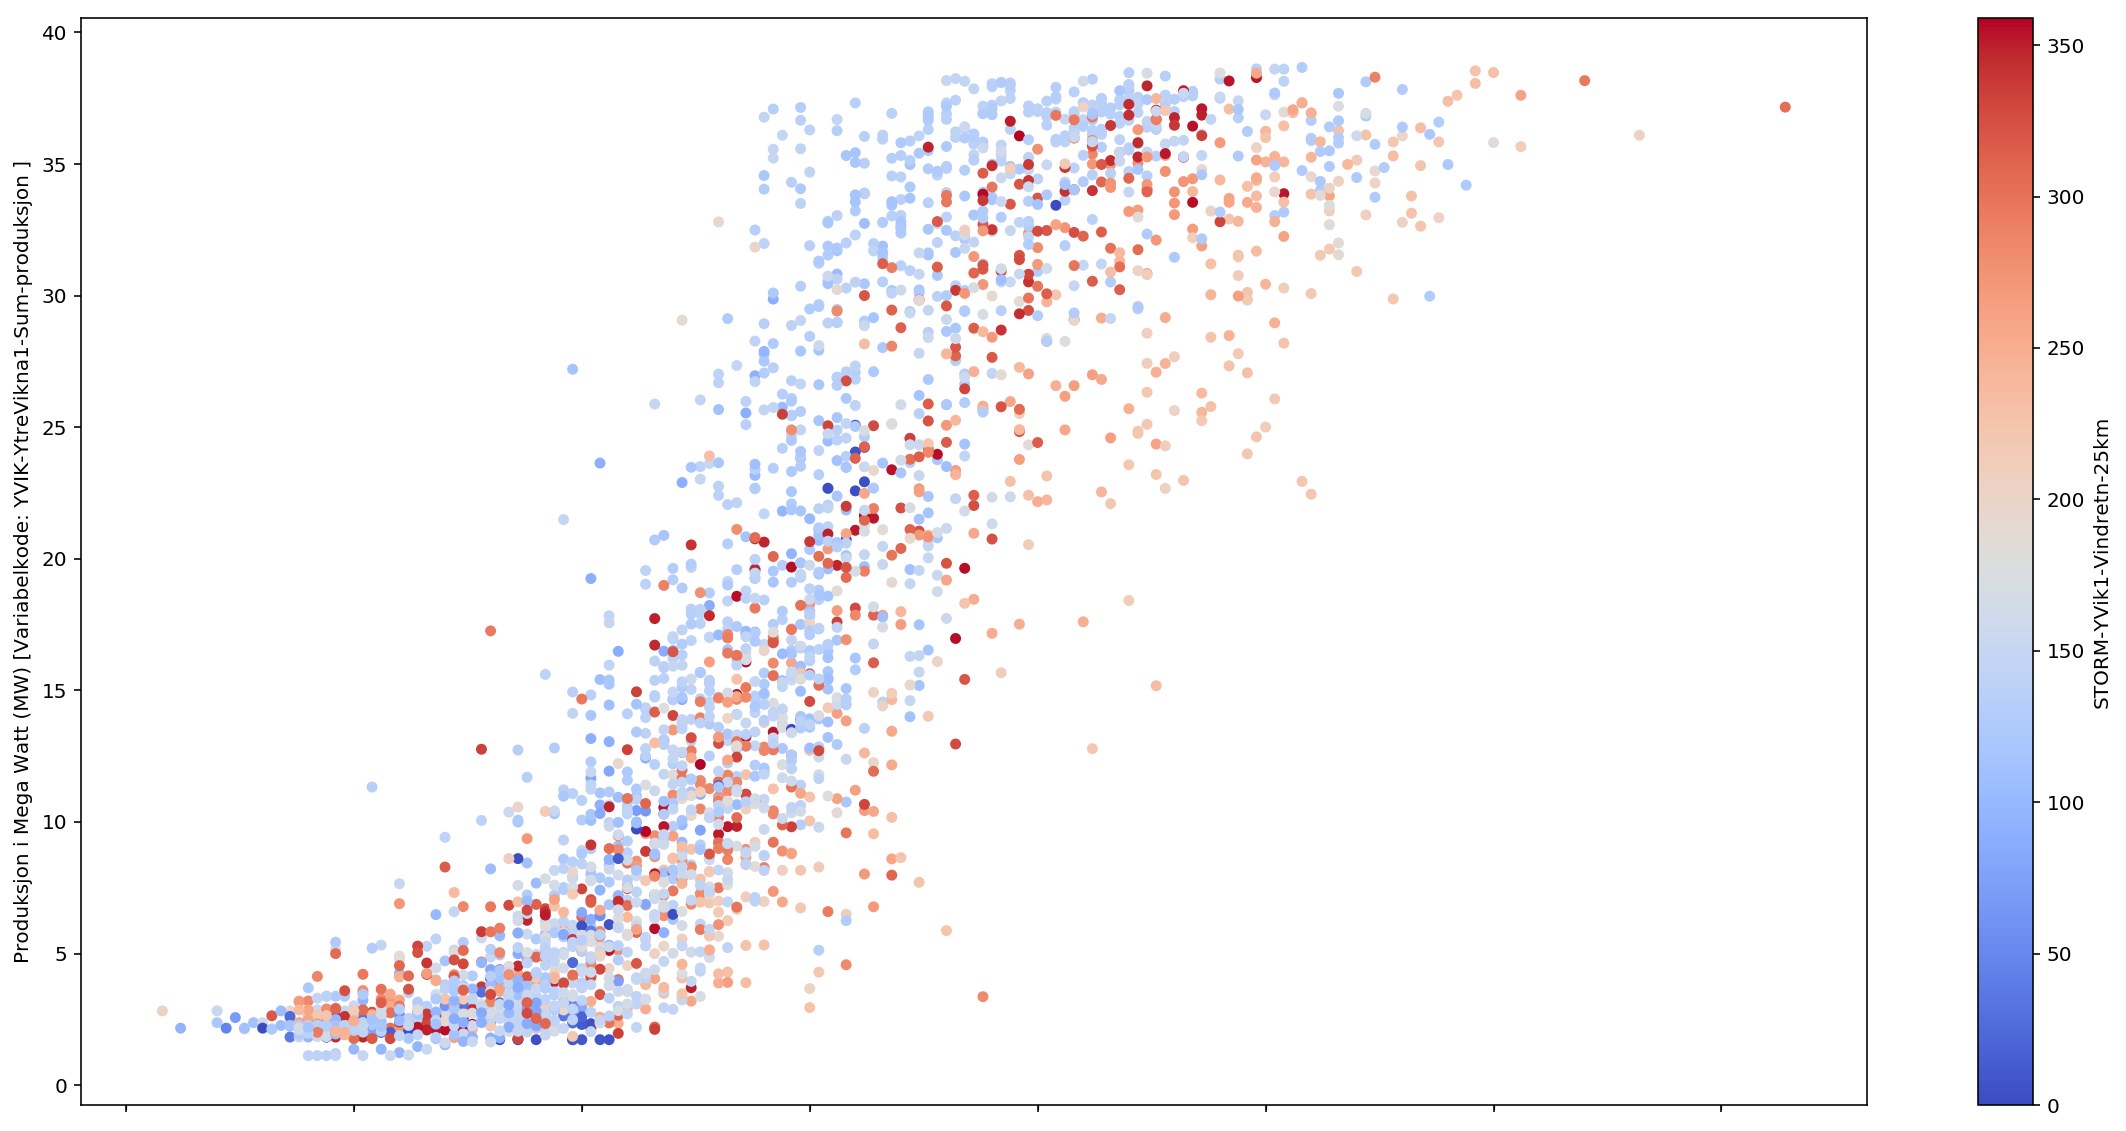

In [18]:
ax = df_tek.plot.scatter(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1-Sum-produksjon',
                   c='STORM-YVik1-Vindretn-25km',cmap='coolwarm', figsize = (20,10))
plt.xlabel('VIND Ytre Vika Værstasjon (m/s) [Variabelkode: STORM-YVik1-Vindhast-25km]')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: YVIK-YtreVikna1-Sum-produksjon ]')

fig = ax.get_figure()
fig.savefig('produksjon og vindhastighet pluss vindretning.png')

### Samme plot med med temperatur som fargekode

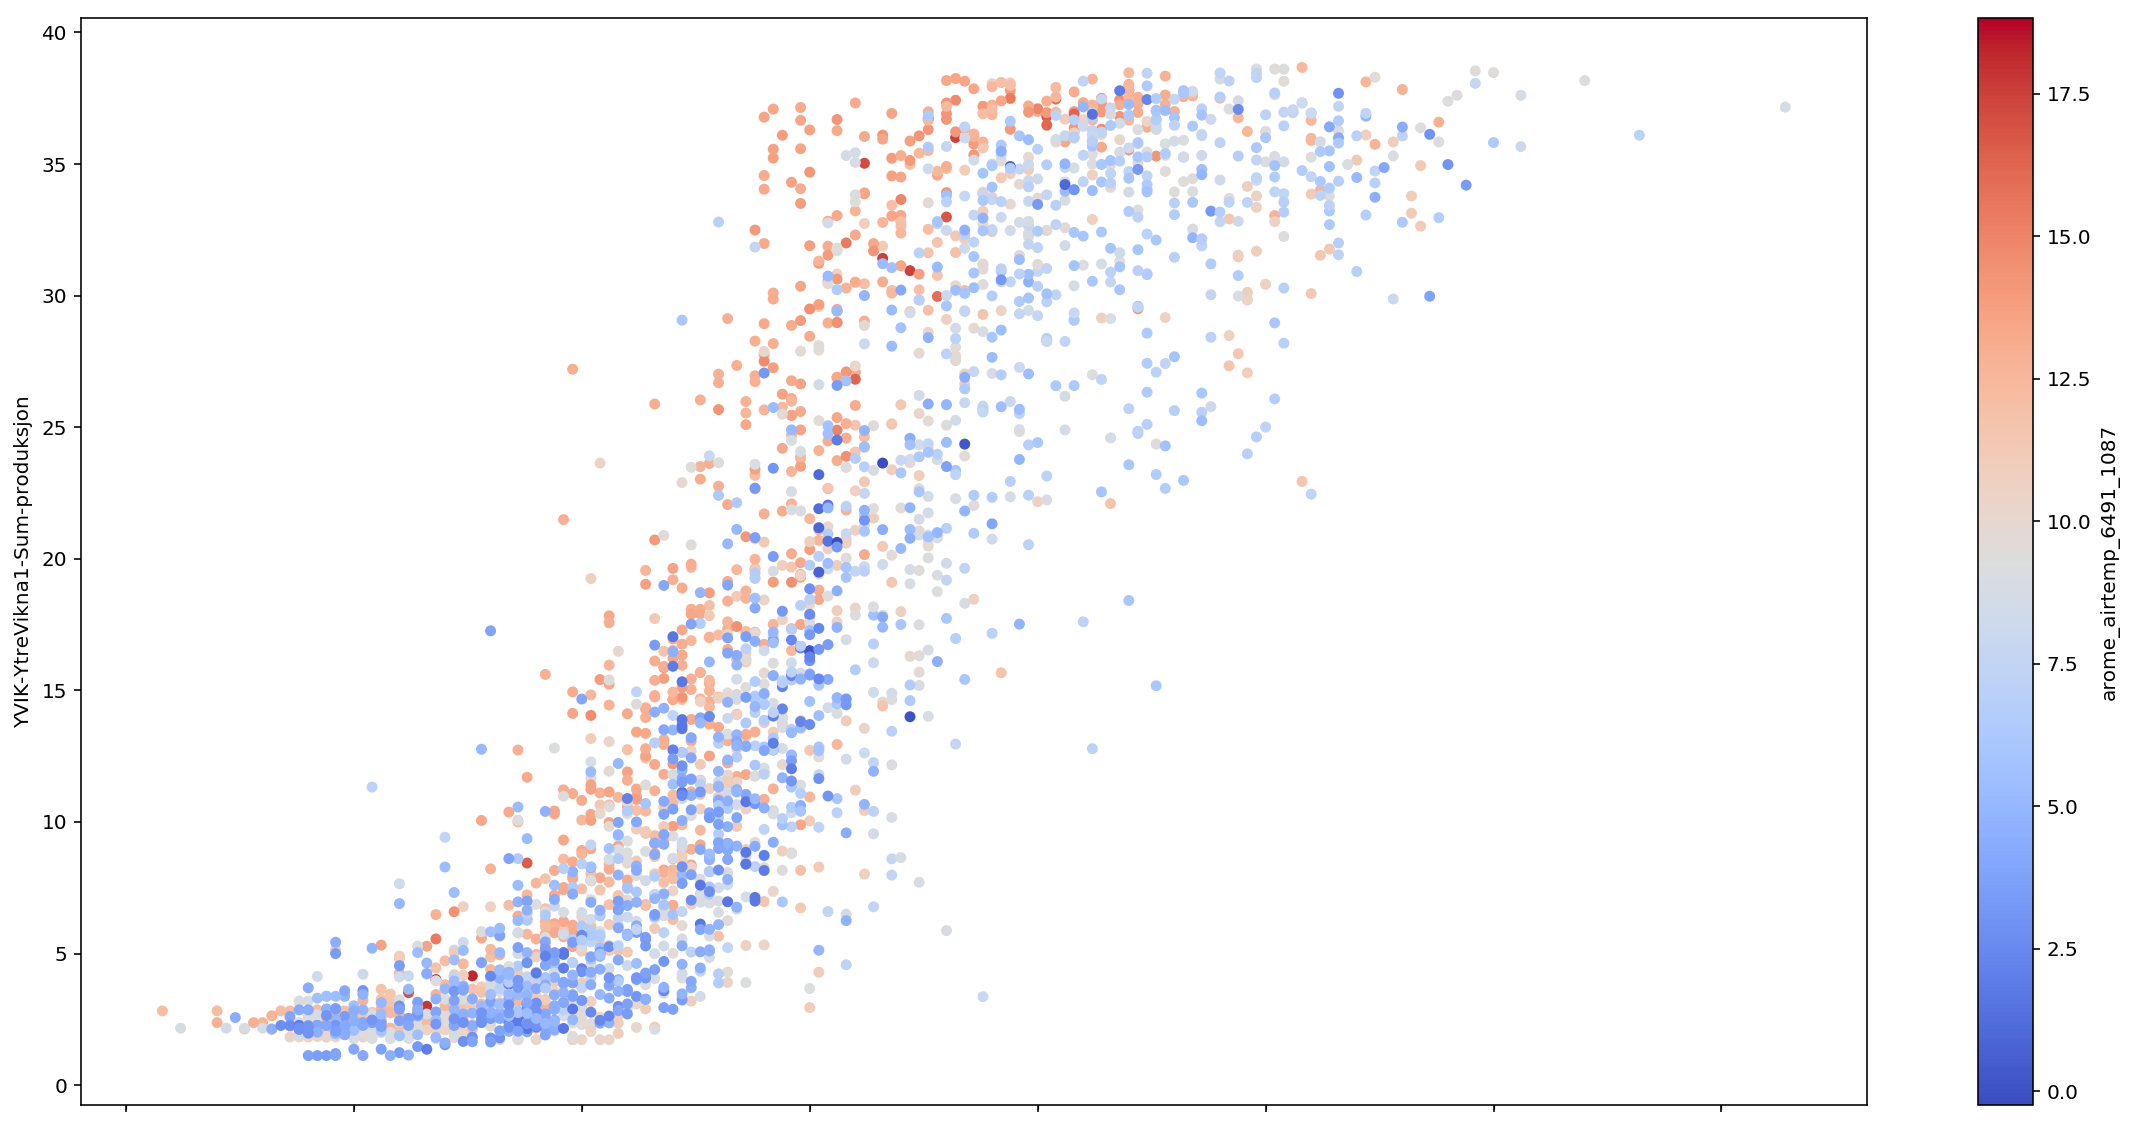

In [51]:
# Legger ved Arome værdata
df_tek['arome_airtemp_6491_1087'] = df_arome['/arome_airtemp_6491_1087']

# Plotter og lagrer
ax = df_tek.plot.scatter(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1-Sum-produksjon',
                   c='arome_airtemp_6491_1087',cmap='coolwarm', figsize = (20,10))

fig = ax.get_figure()
fig.savefig('produksjon og vindhastighet pluss temperatur.png')


### Sjekker for sammengeng mellom trykk

In [52]:
# Legger ved Arome værdata
df_tek['arome_airpress_6491_1087'] = df_arome['/arome_airpress_6491_1087']

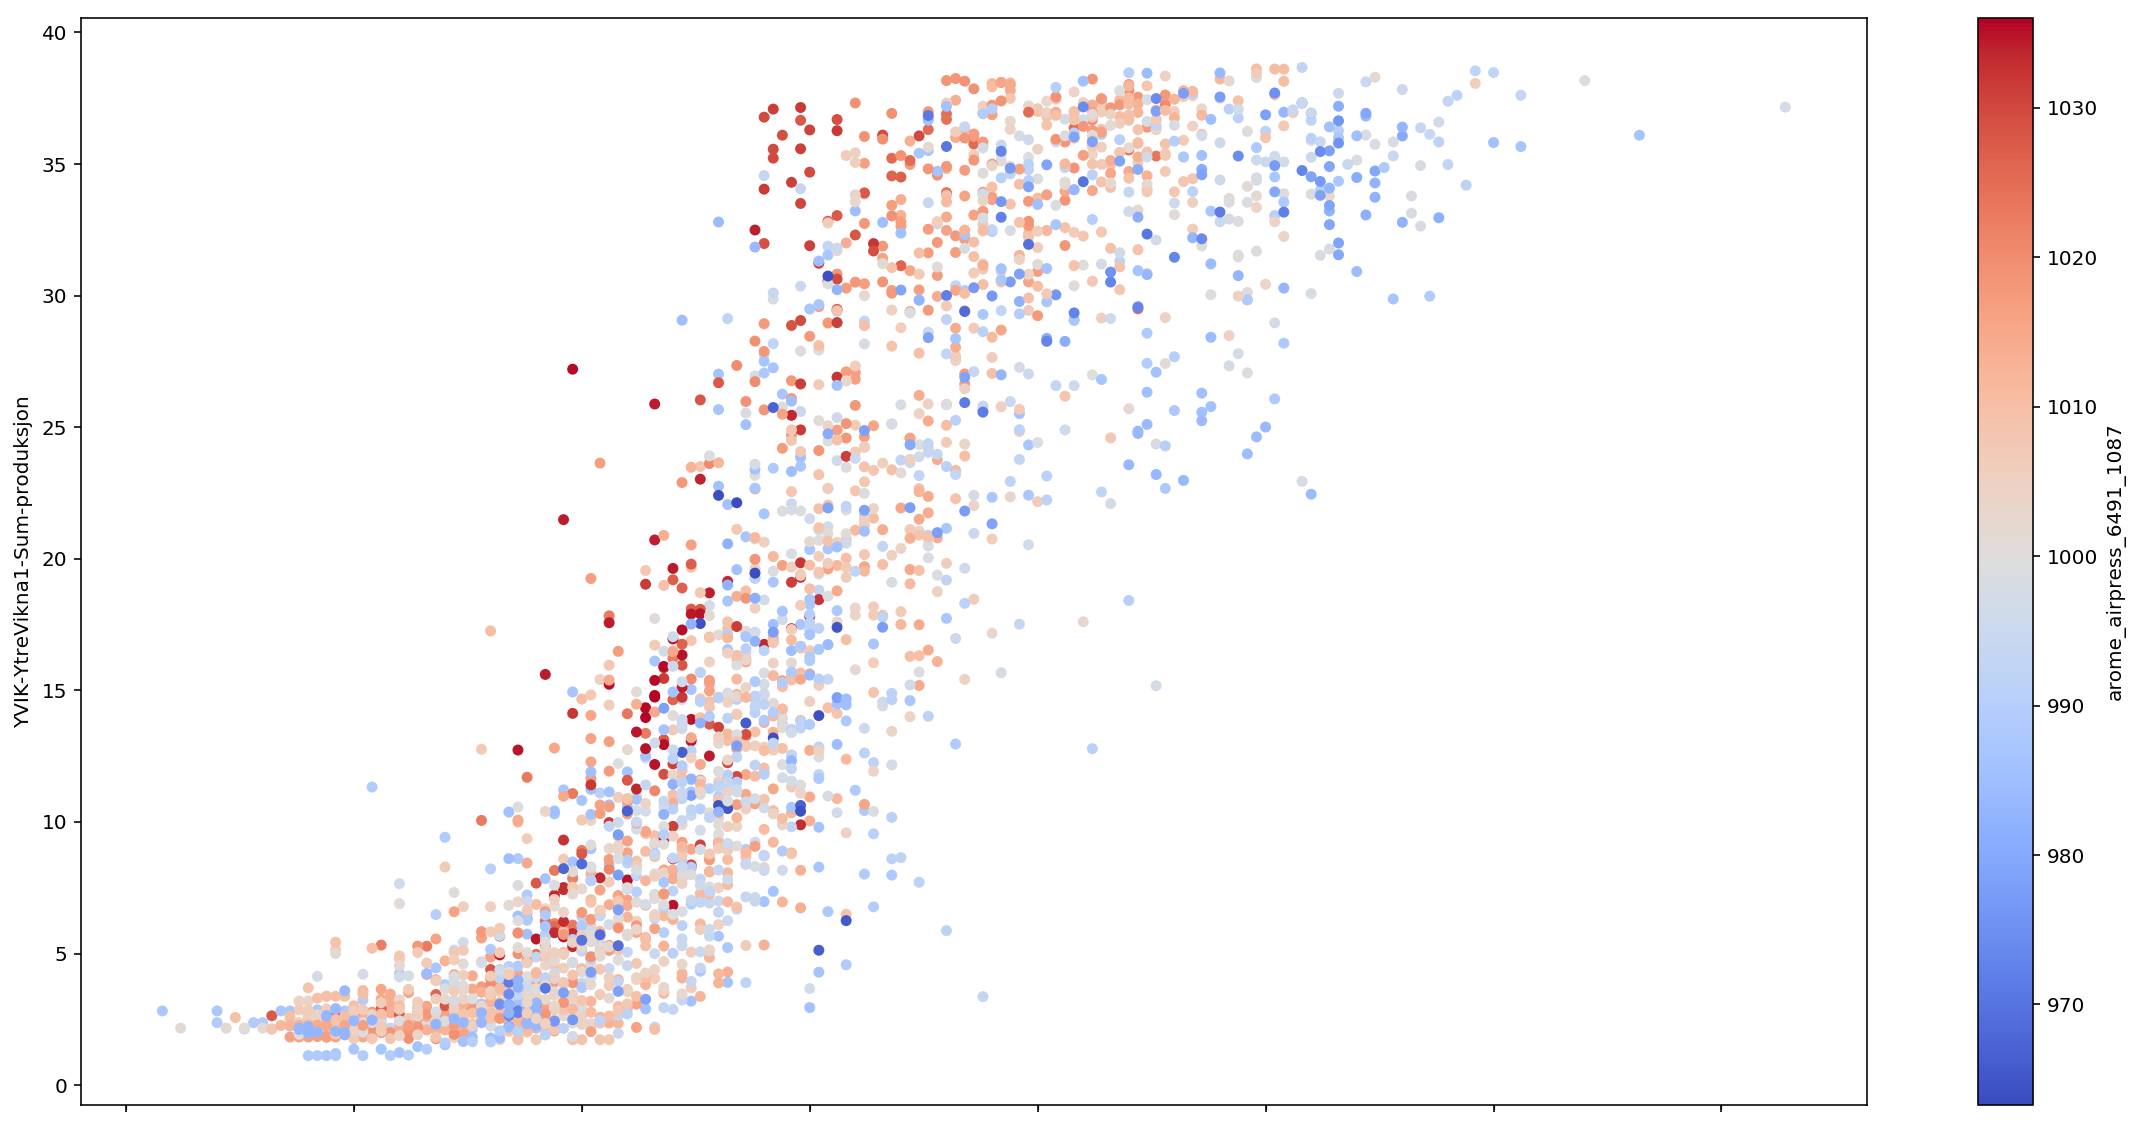

In [53]:

# Plotter og lagrer
ax = df_tek.plot.scatter(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1-Sum-produksjon',
                   c='arome_airpress_6491_1087',cmap='coolwarm', figsize = (20,10))

fig = ax.get_figure()
fig.savefig('produksjon og vindhastighet pluss trykk.png')

#### Plot over produksjonen i September

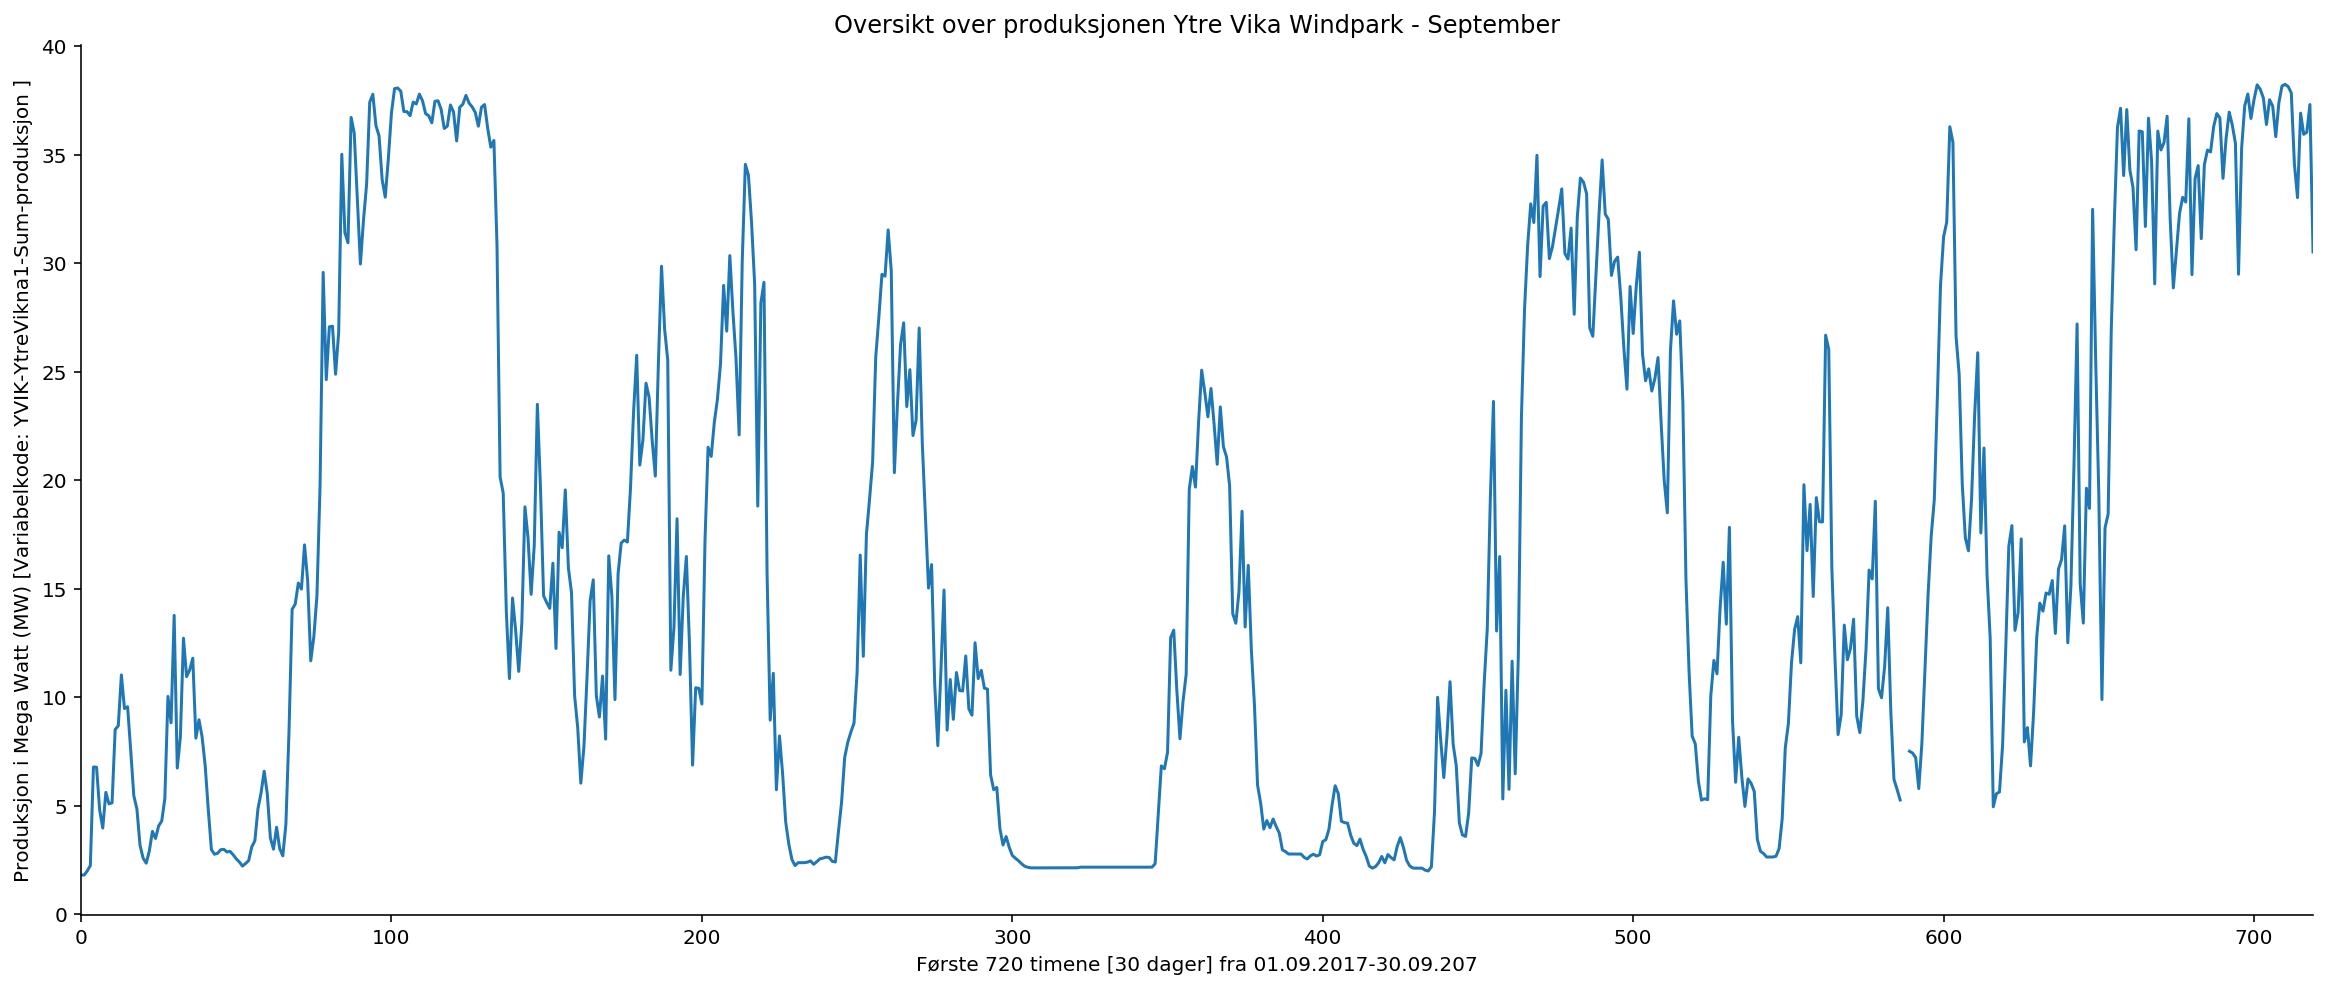

In [41]:
ax = df_tek['YVIK-YtreVikna1-Sum-produksjon'].head(720).plot(figsize=(20,8))

plt.xlabel('Første 720 timene [30 dager] fra 01.09.2017-30.09.207')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: YVIK-YtreVikna1-Sum-produksjon ]')
plt.title('Oversikt over produksjonen Ytre Vika Windpark - September')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('produksjon i september.png')

### Sammenligning med dagens modell

In [47]:
df_tek['delayed 2 hours'] = df_tek_delayed['YVIK-YtreVikna1-Sum-produksjon']

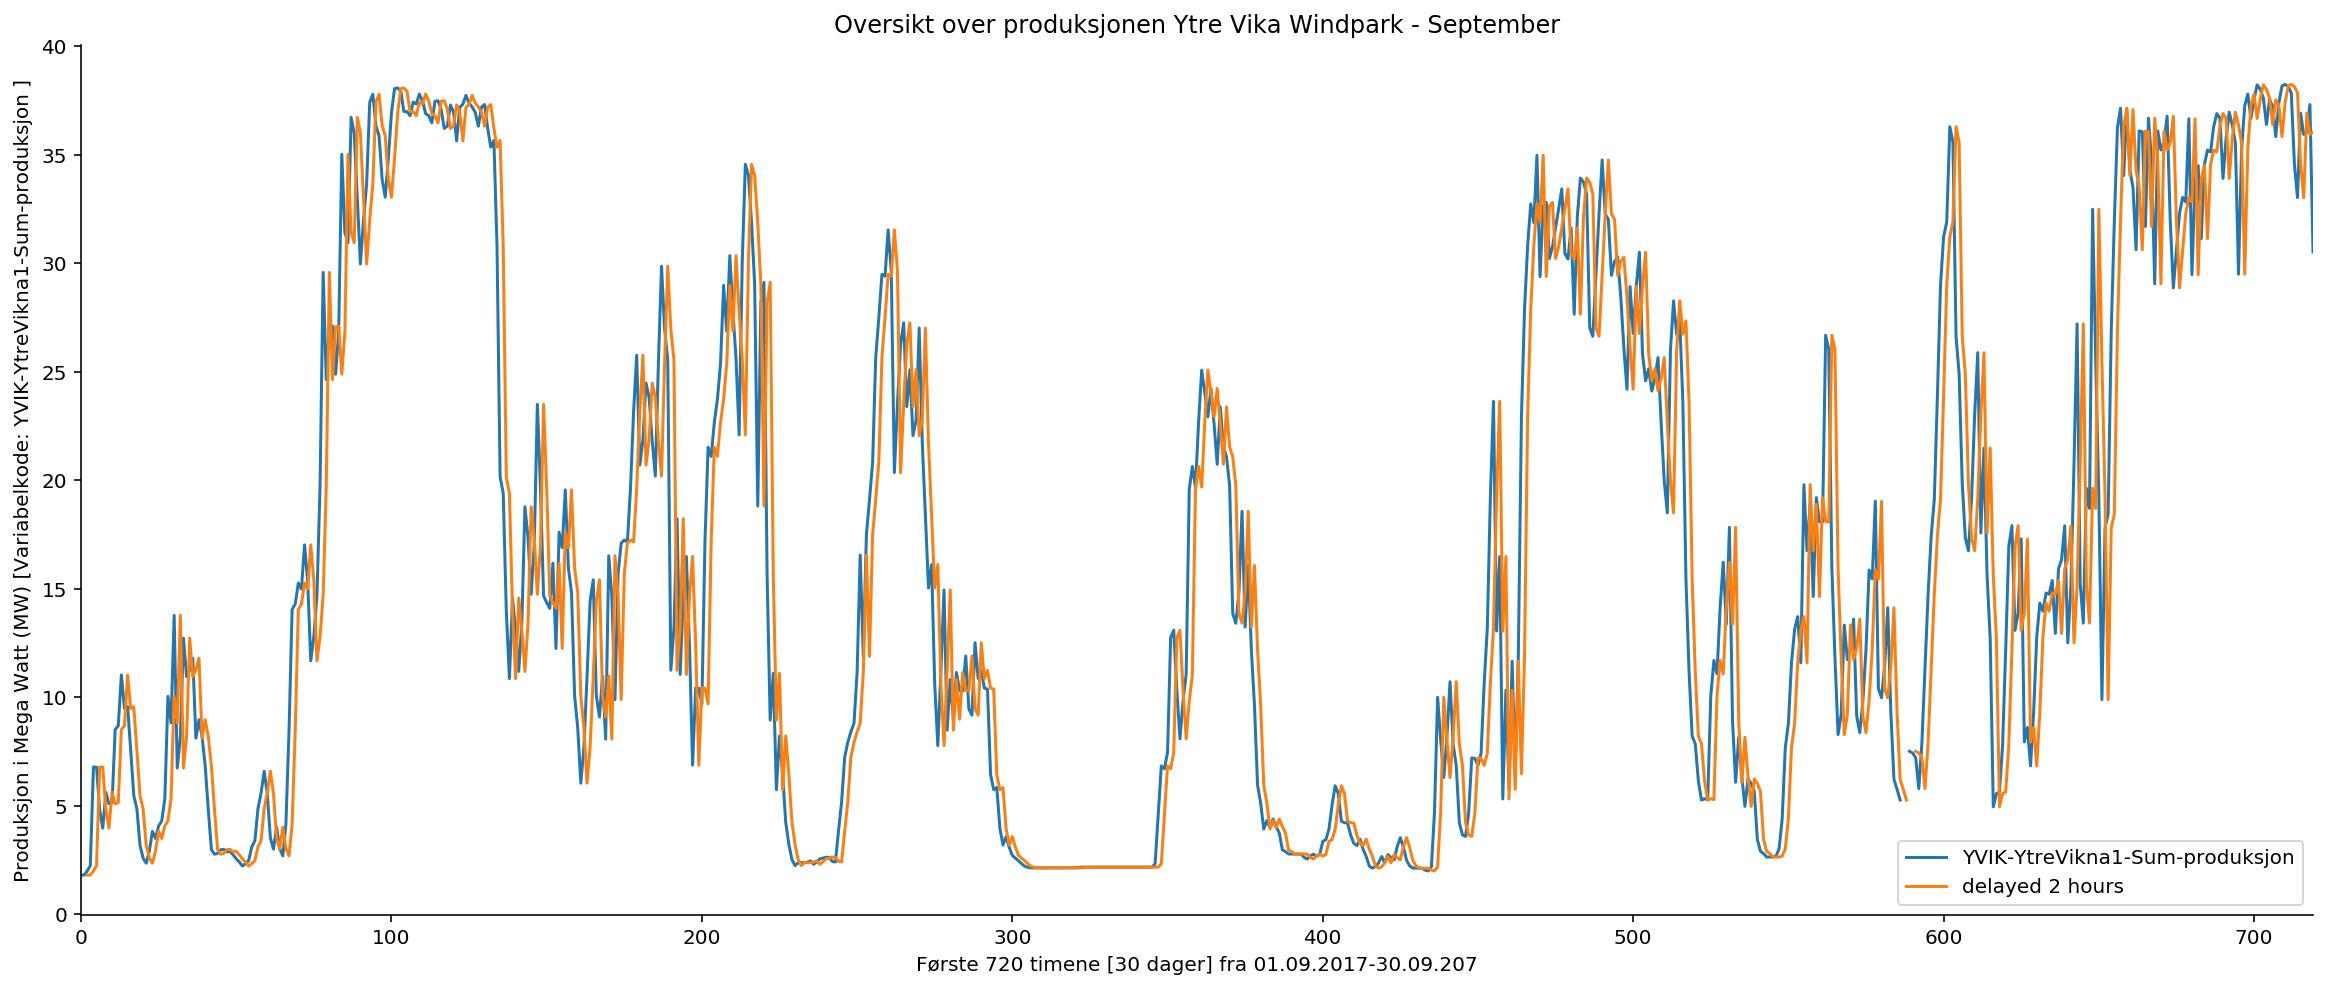

In [49]:
ax = df_tek['YVIK-YtreVikna1-Sum-produksjon'].head(720).plot(figsize=(20,8))
ax = df_tek['delayed 2 hours'].head(720).plot(figsize=(20,8))

plt.xlabel('Første 720 timene [30 dager] fra 01.09.2017-30.09.207')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: YVIK-YtreVikna1-Sum-produksjon ]')
plt.title('Oversikt over produksjonen Ytre Vika Windpark - September')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('produksjon i september sammenligning.png')

#### Sammenligning zoomet inn

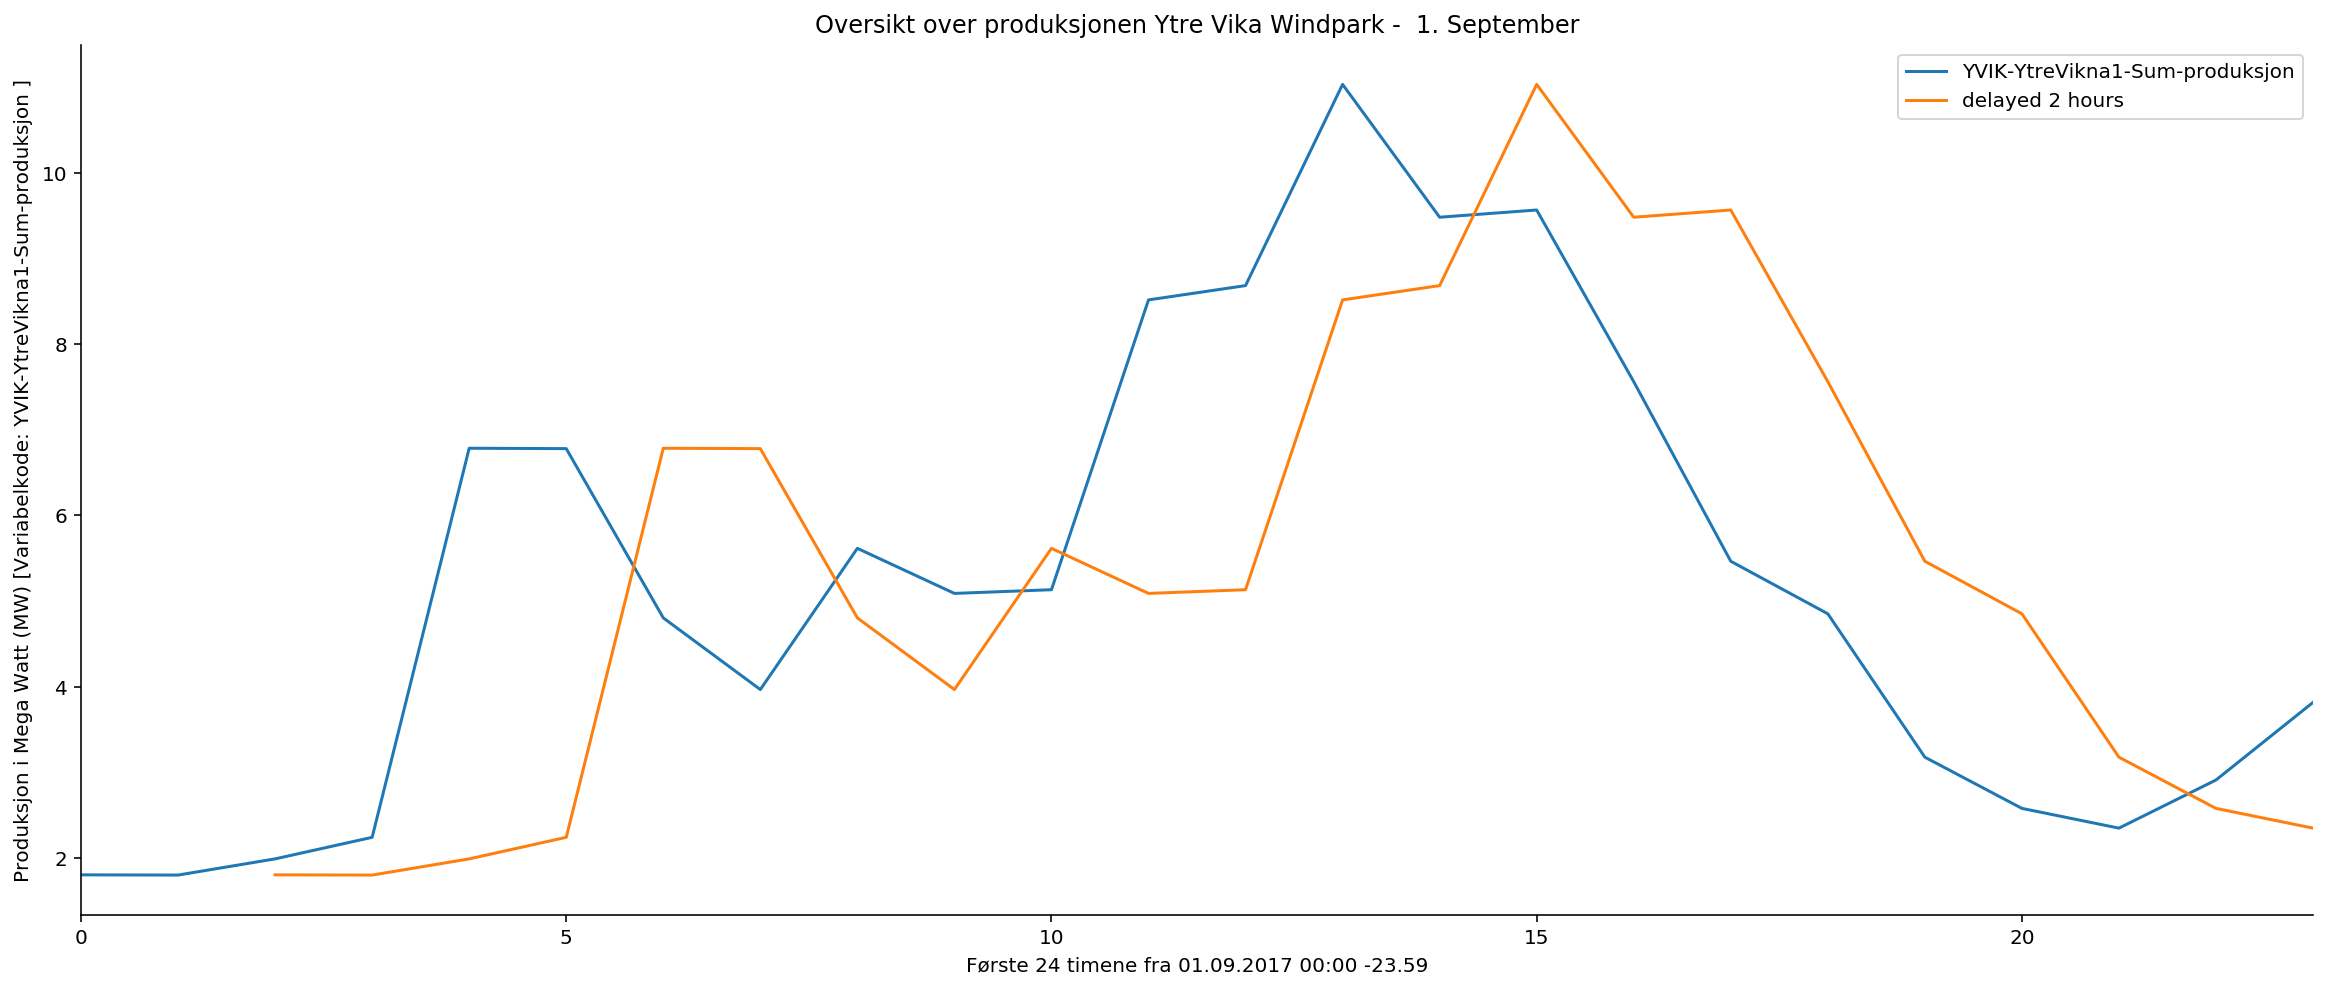

In [50]:
ax = df_tek['YVIK-YtreVikna1-Sum-produksjon'].head(24).plot(figsize=(20,8))
ax = df_tek['delayed 2 hours'].head(24).plot(figsize=(20,8))

plt.xlabel('Første 24 timene fra 01.09.2017 00:00 -23.59')
plt.ylabel('Produksjon i Mega Watt (MW) [Variabelkode: YVIK-YtreVikna1-Sum-produksjon ]')
plt.title('Oversikt over produksjonen Ytre Vika Windpark -  1. September')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('produksjon i 1 september.png')

### Visualisering av nøyaktigheten på dagens modell

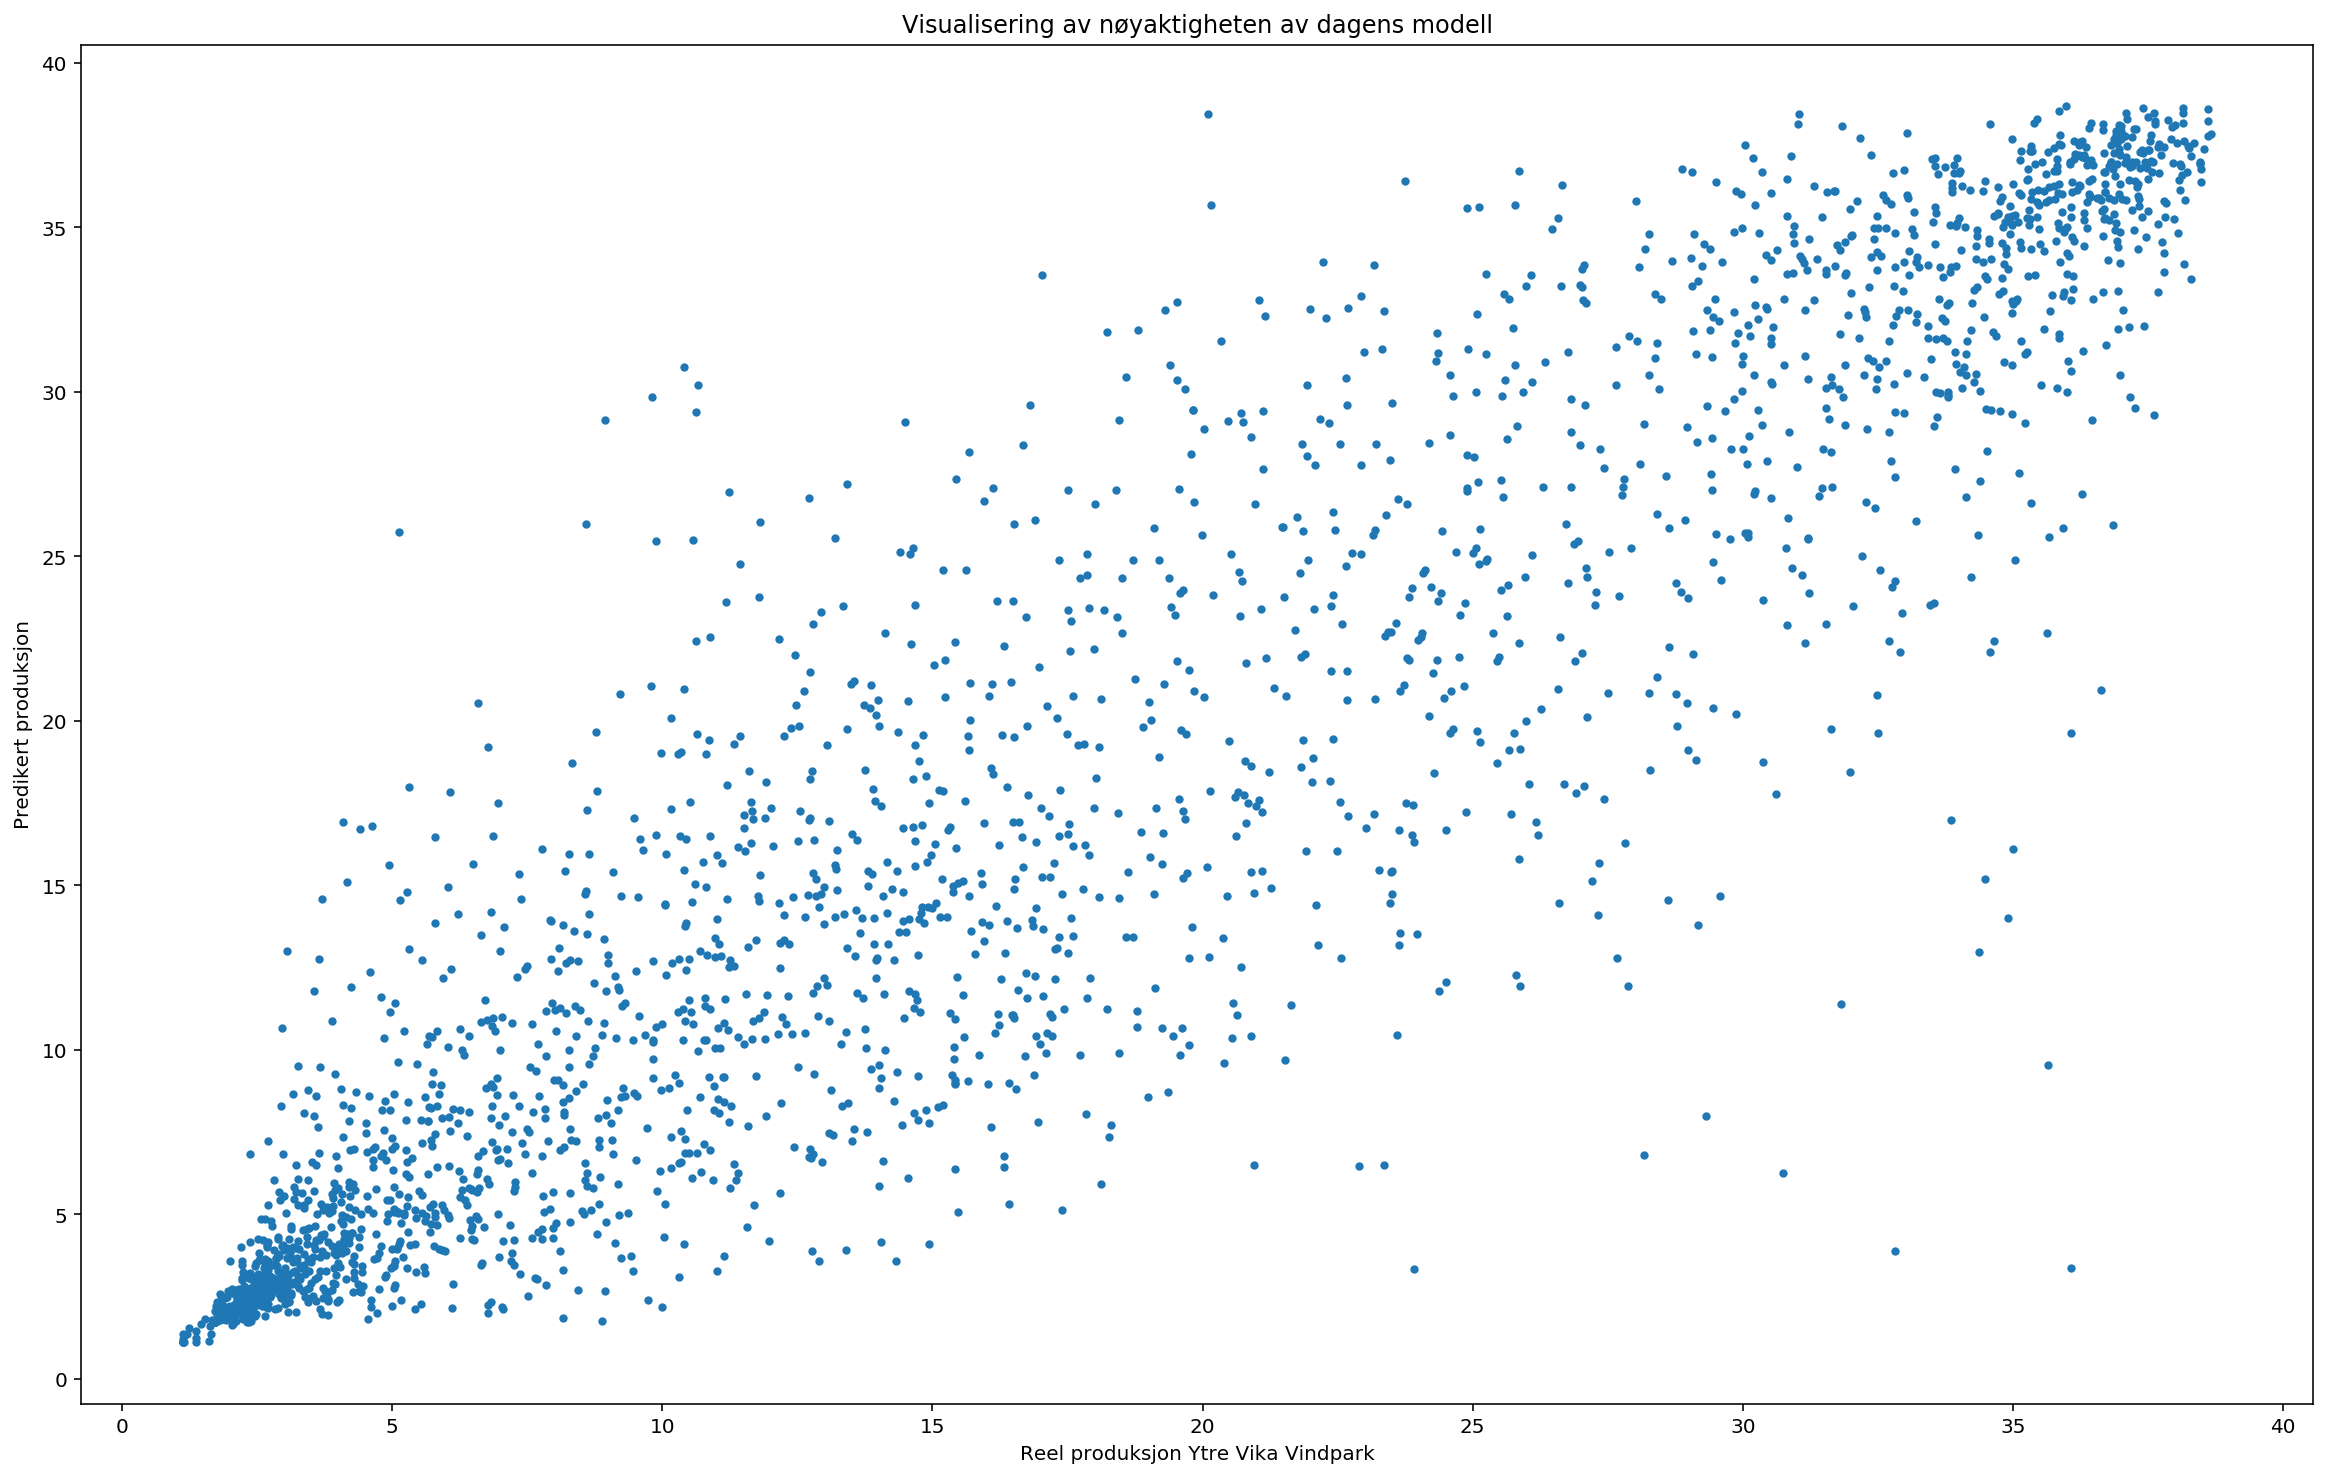

In [105]:
plt.figure(figsize=(20, 12.5))
plt.scatter(df_tek['YVIK-YtreVikna1-Sum-produksjon'],df_tek['delayed 2 hours'], s = 10, c )

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av dagens modell')

plt.savefig('nøyaktighet.png')

In [93]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
import numpy as np

In [82]:
# Fjerner nan og tomme verdier (snakk om kun 8 stk.)
comp = pd.concat([df_tek['YVIK-YtreVikna1-Sum-produksjon'], df_tek['delayed 2 hours']], axis=1)

comp.dropna(inplace = True)
comp.head()

YVIK-YtreVikna1-Sum-produksjon  delayed 2 hours
2                        1.992983         1.806583
3                        2.244483         1.804100
4                        6.783783         1.992983
5                        6.779333         2.244483
6                        4.804400         6.783783

In [98]:
comp['differanse'] = comp['YVIK-YtreVikna1-Sum-produksjon']- comp['delayed 2 hours']

In [103]:
comp['abs_diff'] = comp['differanse'].apply(abs)

comp.head()

YVIK-YtreVikna1-Sum-produksjon  delayed 2 hours  differanse  abs_diff
2                        1.992983         1.806583    0.186400  0.186400
3                        2.244483         1.804100    0.440383  0.440383
4                        6.783783         1.992983    4.790800  4.790800
5                        6.779333         2.244483    4.534850  4.534850
6                        4.804400         6.783783   -1.979383  1.979383

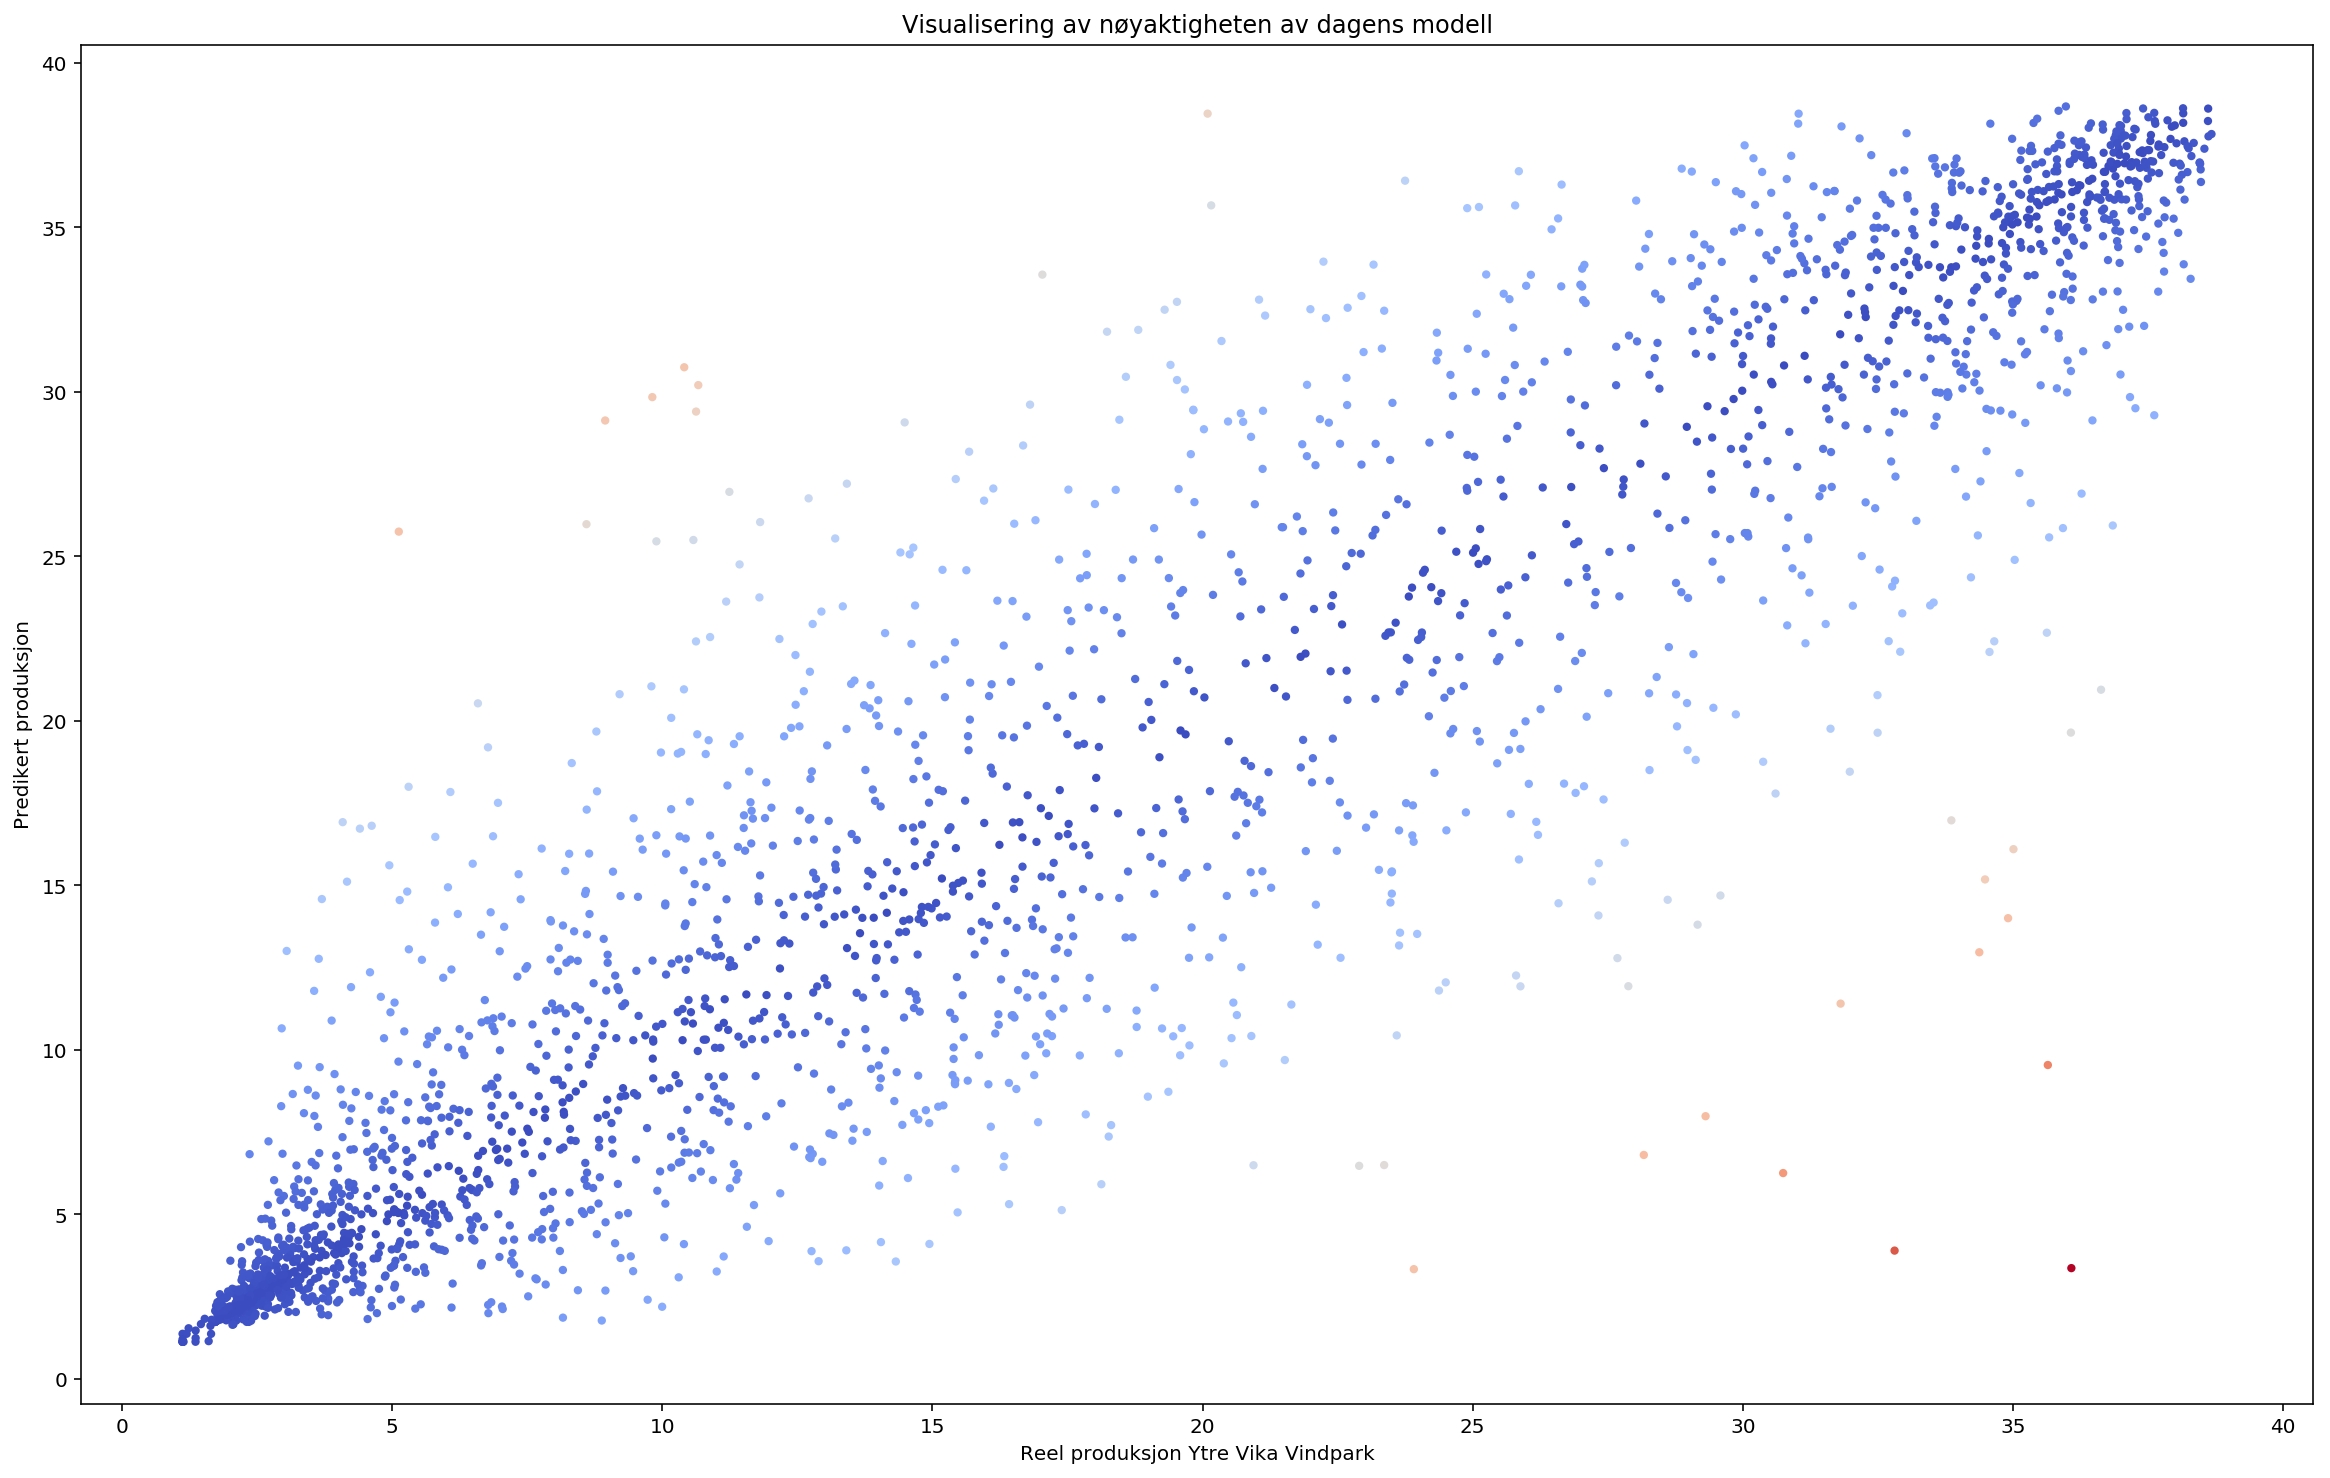

In [104]:
plt.figure(figsize=(20, 12.5))
plt.scatter(comp['YVIK-YtreVikna1-Sum-produksjon'],comp['delayed 2 hours'], s = 10, c=comp['abs_diff'], cmap='coolwarm' )

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av dagens modell')

plt.savefig('nøyaktighet_better.png')

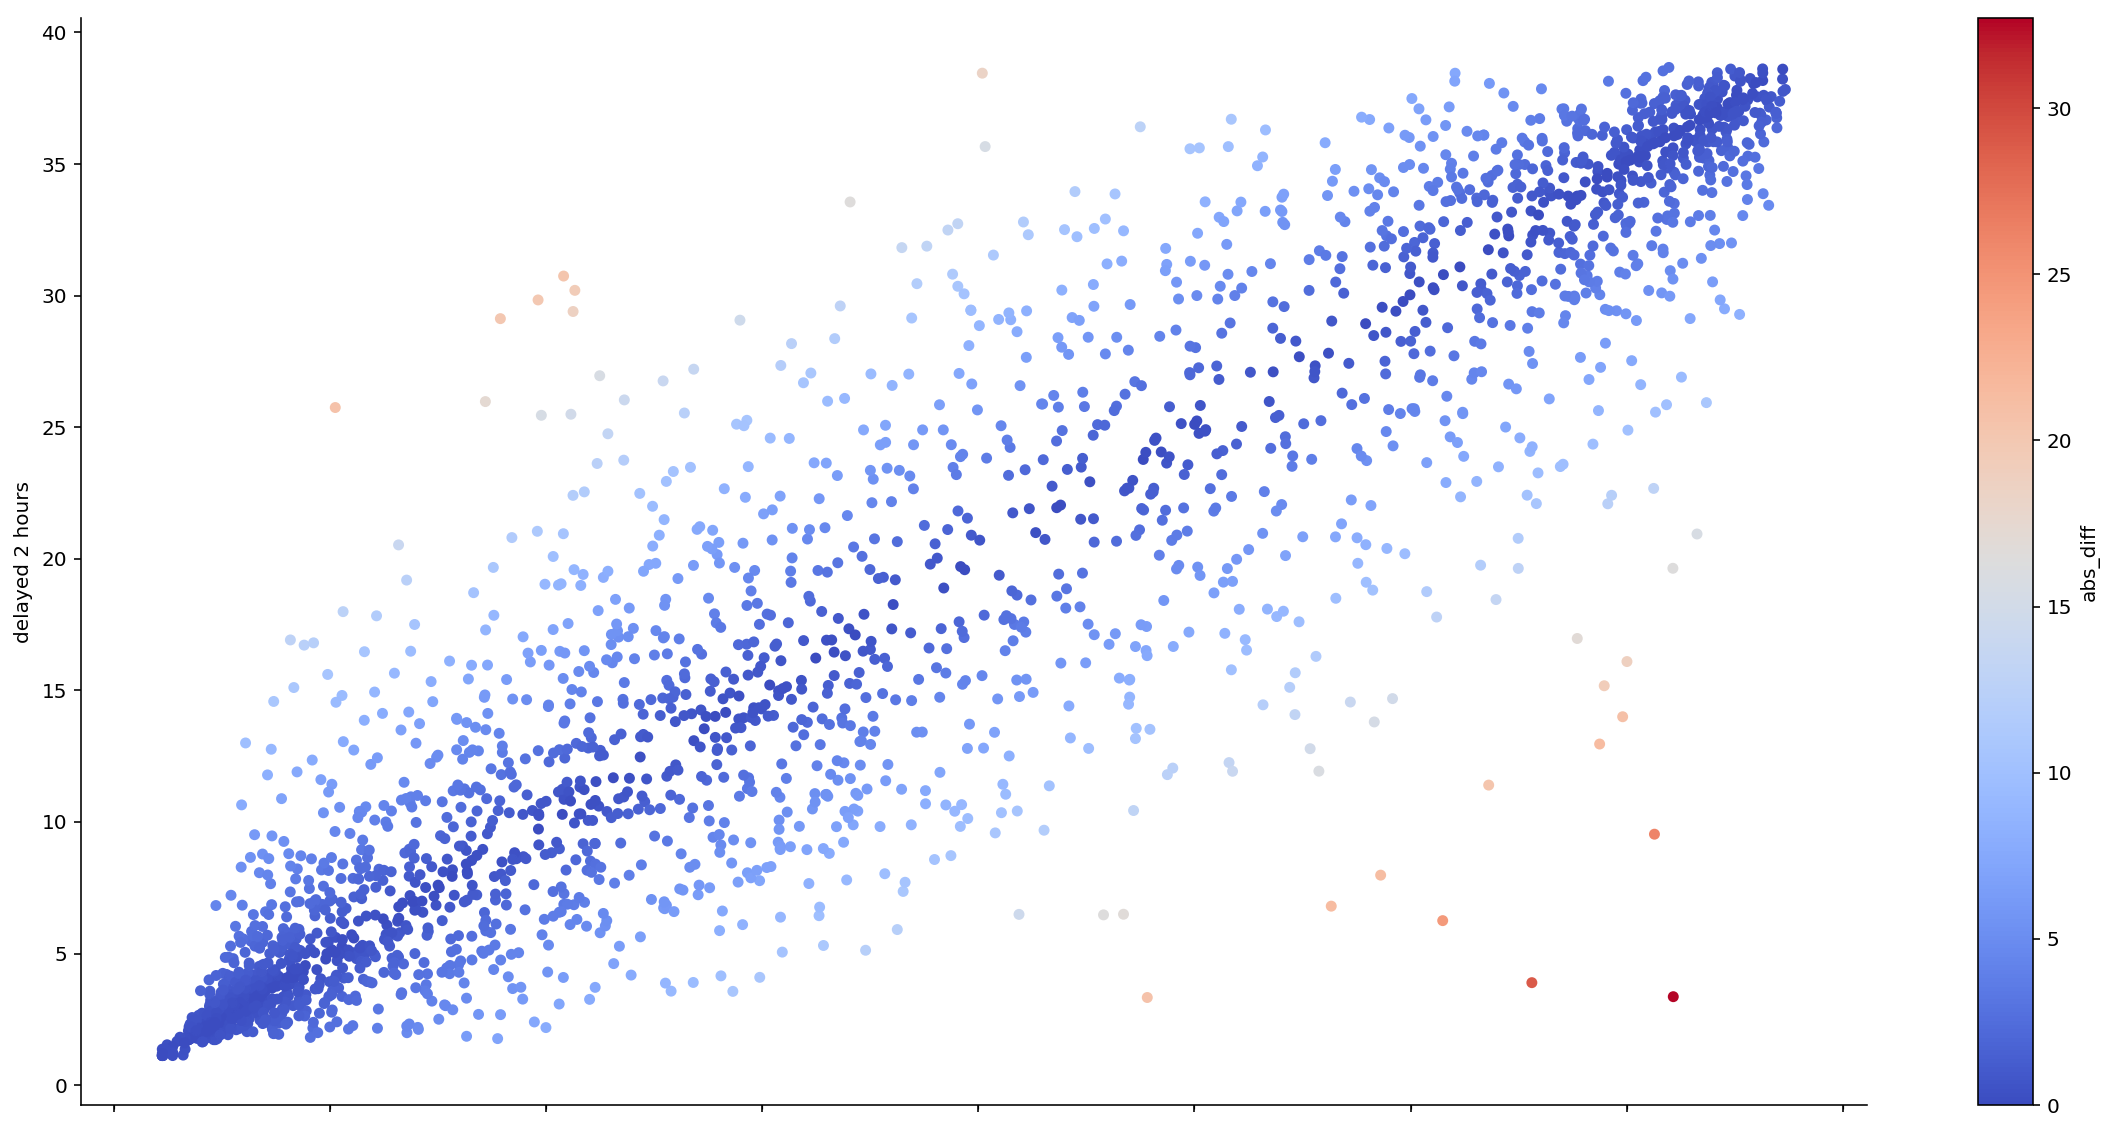

In [120]:
ax = comp.plot.scatter(x='YVIK-YtreVikna1-Sum-produksjon',y='delayed 2 hours',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
fig.savefig('nøyaktighet_very_good.png')

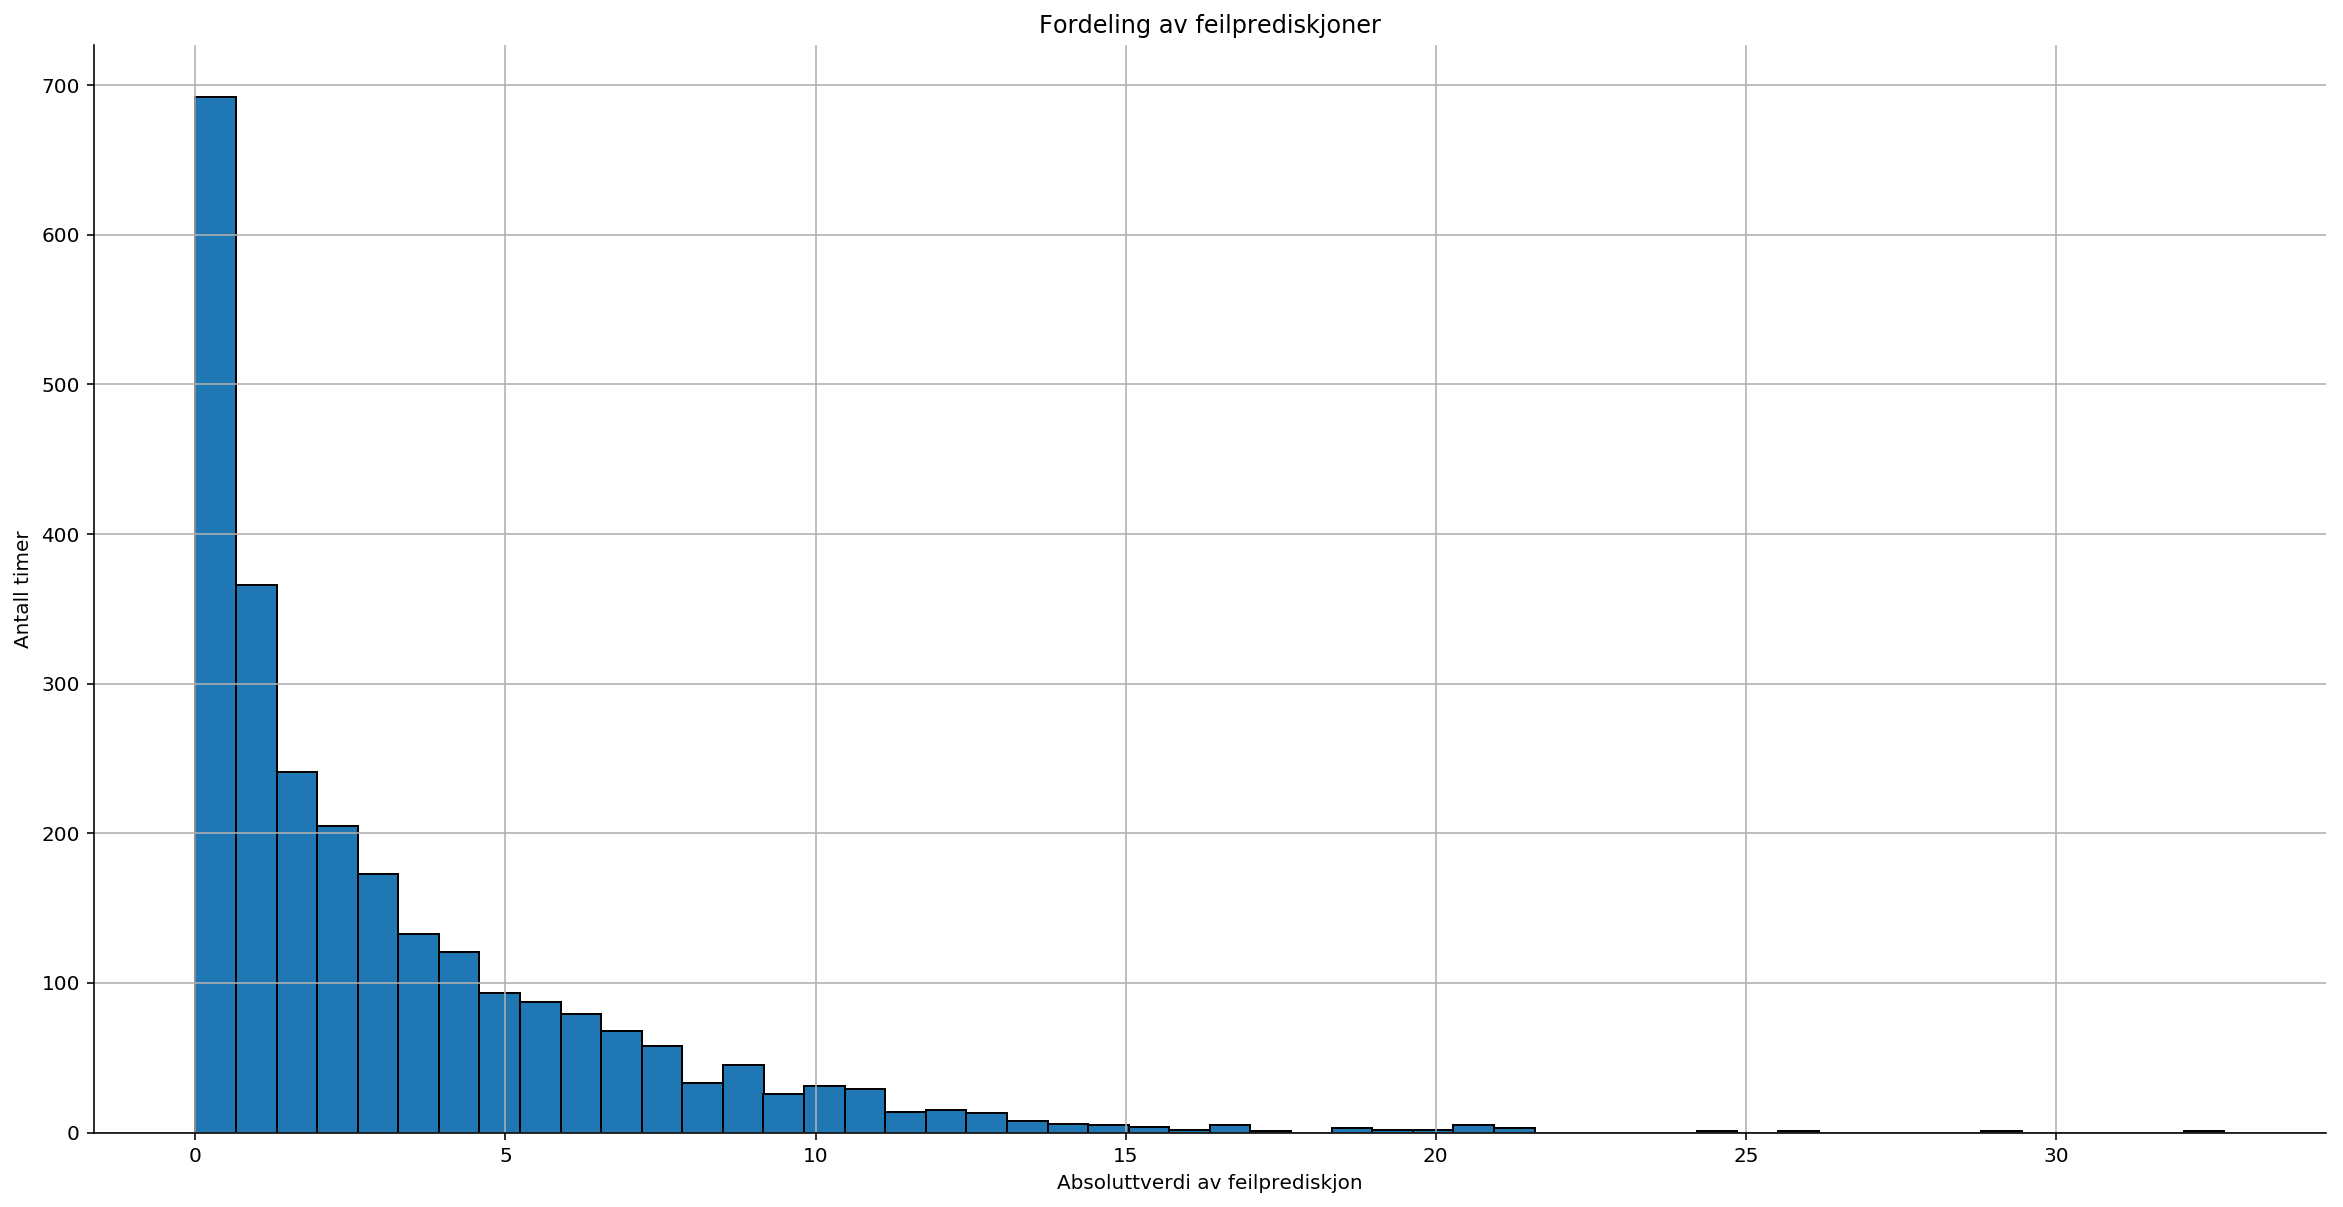

In [118]:
ax = comp['abs_diff'].hist(bins=50,figsize = (20,10))

plt.xlabel('Absoluttverdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
fig.savefig('hist av abs.png')

In [84]:
# Mean Squared Error
print('Mean Squared Error:', mean_squared_error(comp['YVIK-YtreVikna1-Sum-produksjon'], comp['delayed 2 hours']))

Mean Squared Error: 22.8867743892


In [90]:
# Root Mean Squared Error
print('Root mean squared error:', np.sqrt(mean_squared_error(comp['YVIK-YtreVikna1-Sum-produksjon'], comp['delayed 2 hours'])))

Root mean squared error: 4.78401237344


In [91]:
# Mean Absolute Error
print('Mean Absolute Error:', mean_absolute_error(comp['YVIK-YtreVikna1-Sum-produksjon'], comp['delayed 2 hours']))

Mean Absolute Error: 3.15588251617


In [92]:
# Median Absoulute Error
print('Median Absolute Error:', median_absolute_error(comp['YVIK-YtreVikna1-Sum-produksjon'], comp['delayed 2 hours']))

Median Absolute Error: 1.929082765


##### Plotly (interaktiv visualisering)

In [ ]:
#from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf
## For Notebooks
#init_notebook_mode(connected=True)
#cf.go_offline()
#
#df_tek.iplot(x='STORM-YVik1-Vindhast-25km',y='YVIK-YtreVikna1-Sum-produksjon', kind= 'scatter', mode='markers', size=3)